<a href="https://colab.research.google.com/github/katzesoundz/projetos/blob/main/igua%C3%A7u_climate_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLIMATE CHANGES IN IGUAÇU AREA THROUGHOUT TIME**

# **Iguaçu Region**

The area to be studied is a mix of three regions of different countries: Argentina - Misiones, Brazil - Paraná and Paraguay - Alto Paraná.

This border area is particularly interesting because it is where is located the Itaipú Dam, the second largest hydroelectric power plant in the world, built in 1989. The project had a [huge](https://www.ucsusa.org/resources/environmental-impacts-hydroelectric-power) [environmental impact](https://brasilexperience.weebly.com/uploads/3/9/0/2/39029957/annat-parks.pdf), specially due to the closing of the sluices. An area of 1,500 km2 of forests and arable land was flooded and the [Seven Falls waterfall](https://en.wikipedia.org/wiki/Gua%C3%ADra_Falls), one of the most fascinating natural formations on the planet, got submerged.

Also, around 20km from the dam, is located the ecological reserve and protected area of Iguaçu Park. Created in 1939, the park shares the border between Argentina (right side of the second picture) and Brasil (left side of the second picture). This type of area is known for its key role as a [natural solution](https://www.wwf.org.br/informacoes/english/?uNewsID=23342) for the climate change crises. 

Therefore, the aim of this study is to analyze the data of climate changes based on Koppen-Geiger classification in the area. 





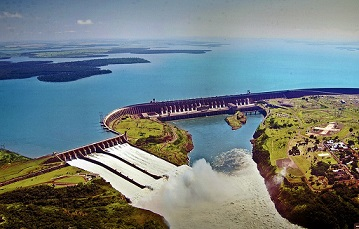

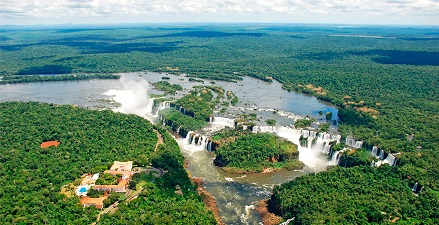

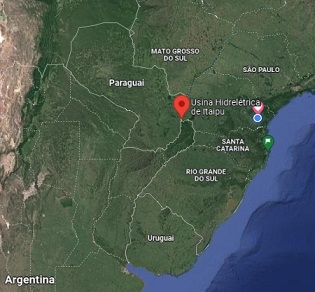

# **Land Sector Datasets - Moja Global**

The data of climate changes based on Koppen-Geiger classification can be found on [Moja Global Land Sector Datasets](https://datasets.mojaglobal.workers.dev/0:/). The files are in json and geojson format, and documentation and metadata info can be found [here](https://github.com/moja-global/Land_Sector_Datasets/tree/master/Data).


1.  Installing and importing packages

In [ ]:
!pip install matplotlib -q
!pip install mapclassify -q
!pip install geoplot -q
!pip install -q condacolab -q
import condacolab
condacolab.install()


In [ ]:
# this could take long and sometimes is needed to run it twice.
!conda install geopandas
import geopandas as gpd

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import geoplot
import geoplot.crs as gcrs
import geoplot as gplt
import io
import requests
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

2. Converting the data of the countries regions to a Dataframe and merge them all:

OBS: Even though the documentation points out that all datasets are with the same Coordinate Reference System, EPSG:4326 - WGS 84, something goes wrong when running data from South America. Therefore, it is necessary to perform two conversion steps: the first one to another CRS, 5389, and then back again to EPSG:4326 - WGS 84.

In [243]:
# Argentina
a = requests.get('https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/ARG/ARG_AL4_Misiones.json').content
df_arg = gpd.read_file(io.StringIO(a.decode('utf-8')))

# fix the georeference
df_arg.to_crs(5389, inplace=True)
df_arg.to_crs(4326, inplace=True) # now in WGS84 again
df_arg

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,ARG,AR-N,Misiones,Misiones,Misiones,,administrative,4,Q44798,es:Provincia de Misiones,2019-07-31T01:04:02,"MULTIPOLYGON (((-55.95054 -27.33961, -55.95063..."


In [244]:
# Brazil
b = requests.get('https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/BRA/BRA_AL4_Paran%C3%A1.json').content
df_bra = gpd.read_file(io.StringIO(b.decode('utf-8')))
df_bra.to_crs(5389, inplace=True)
df_bra.to_crs(4326, inplace=True)
df_bra

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,BRA,BR-PR,Paraná,Paraná,Paraná,,administrative,4,Q15499,pt:Paraná,2019-09-26T22:22:02,"MULTIPOLYGON (((-48.03818 -25.35710, -48.03822..."


In [245]:
# Paraguay
p = requests.get('https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/PRY/PRY_AL4_Alto%20Paran%C3%A1.json').content
df_pry = gpd.read_file(io.StringIO(p.decode('utf-8')))
df_pry.to_crs(5389, inplace=True)
df_pry.to_crs(4326, inplace=True)
df_pry

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,PRY,PY-10,Alto Paraná,,Alto Paraná,,administrative,4,Q682654,,2019-09-23T22:03:02,"POLYGON ((-55.11231 -24.50793, -55.12659 -24.4..."


In [246]:
# merged trinational data
df_bi = pd.merge(df_arg, df_bra, how='outer', on = 'geometry')
df_tri = pd.merge(df_bi, df_pry, how='outer', on = 'geometry')
df_tri

,country_x,ISO3166_2_x,name_x,enname_x,locname_x,offname_x,boundary_x,adminlevel_x,wikidata_x,wikimedia_x,timestamp_x,geometry,country_y,ISO3166_2_y,name_y,enname_y,locname_y,offname_y,boundary_y,adminlevel_y,wikidata_y,wikimedia_y,timestamp_y,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp
0,ARG,AR-N,Misiones,Misiones,Misiones,,administrative,4.0,Q44798,es:Provincia de Misiones,2019-07-31T01:04:02,"MULTIPOLYGON (((-55.95054 -27.33961, -55.95063...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.03818 -25.35710, -48.03822...",BRA,BR-PR,Paraná,Paraná,Paraná,,administrative,4.0,Q15499,pt:Paraná,2019-09-26T22:22:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-55.11231 -24.50793, -55.12659 -24.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRY,PY-10,Alto Paraná,,Alto Paraná,,administrative,4.0,Q682654,,2019-09-23T22:03:02


# **Koppen-Geiger climate classification 1901 - 2100**

Köppen climate classification is a widely used vegetation-based empirical climate classification system developed by German botanist-climatologist Wladimir Köppen. It's based on the idea that climate is best defined by native vegetation. This version provided at Moja Global Dataset shows the changes in the climate regions and biomes over time (from 1901 - 2100) using observations for 1901 - 2000 and the A1F1 IPCC climate scenario for 2001 - 2100. A1F1 is the worst case scenario future projection for climate change modeling. You can find out more information on how this was made by visiting World Maps of Köppen-Geiger Climate Classisification [website](http://koeppen-geiger.vu-wien.ac.at/shifts.htm).

Considering that Itaipú Plant was built in 1984, the first data to be  it analyzed should be befour this period. So this study starts to observe the map from 1951-1975 and 1976-2000 and the maps of future predictions.  


In [188]:
# 1951-1975 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1951-1975.geojson').content
df_51_75 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri51_75 = df_51_75.clip(df_tri)
tri51_75

,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
2194,2195,2195,31,128.0,174.75,"MULTIPOLYGON (((-53.50000 -23.50000, -53.50000..."
2057,2058,2058,14,184.0,359.50,"POLYGON ((-53.00000 -23.00000, -53.50000 -23.0..."
2077,2078,2078,32,5.0,1.00,"POLYGON ((-52.00000 -26.50000, -51.26703 -26.5..."
2068,2069,2069,32,2.0,0.25,"POLYGON ((-52.00000 -26.00000, -52.00000 -25.5..."
2073,2074,2074,32,10.0,2.50,"POLYGON ((-49.50000 -26.22103, -49.50014 -26.2..."
2038,2039,2039,12,8.0,1.75,"POLYGON ((-53.50000 -23.00000, -53.50000 -23.5..."


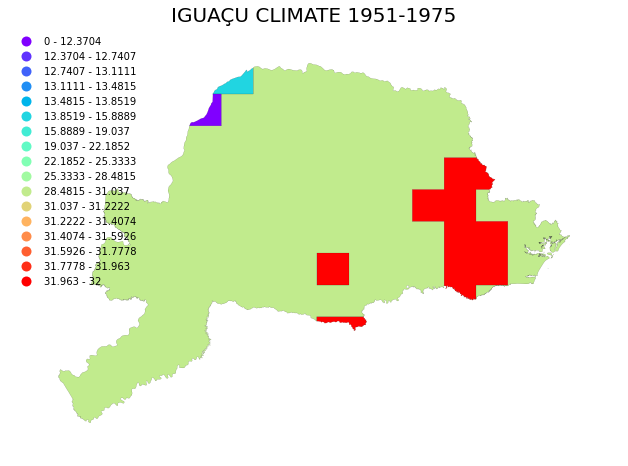

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri51_75['GRIDCODE'], k=27)
gplt.choropleth(tri51_75, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 1951-1975', fontsize=20);

### 31 = Cfa - Humid subtropical climate 

These climates usually occur on the eastern coasts and eastern sides of continents, usually in the high 20s and 30s latitudes. Unlike the dry summer Mediterranean climates, humid subtropical climates have a warm and wet flow from the tropics that creates warm and moist conditions in the summer months. As such, summer (not winter as is the case in Mediterranean climates) is often the wettest season.

Coldest month averaging above 0 °C (32 °F) (or −3 °C (27 °F)), at least one month's average temperature above 22 °C (71.6 °F), and at least four months averaging above 10 °C (50 °F). No significant precipitation difference between seasons. No dry months in the summer.

The flow out of the subtropical highs and the summer monsoon creates a southerly flow from the tropics that brings warm and moist air to the lower east sides of continents. This flow is often what brings the frequent but short-lived summer thundershowers so typical of the more southerly subtropical climates like the southern United States, southern China and Japan.

In [124]:
# 1976-2000 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1976-2000.geojson').content
df_76_00 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri76_00 = df_76_00.clip(df_tri)


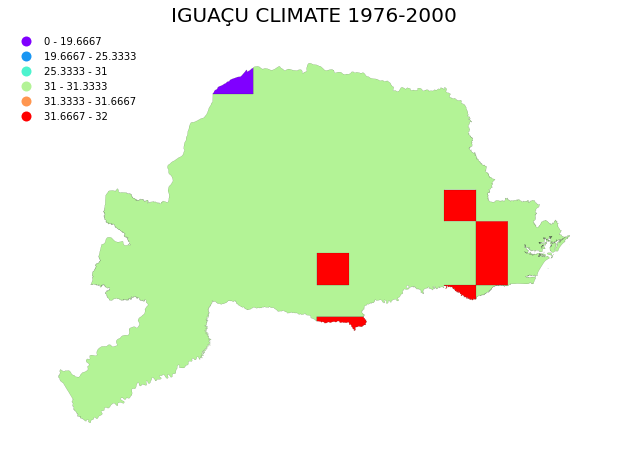

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri76_00['GRIDCODE'], k=18)
gplt.choropleth(tri76_00, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 1976-2000', fontsize=20);

In [201]:
# 2001-2025 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-A1FI.geojson').content
df_01_25 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri01_25 = df_01_25.clip(df_tri)

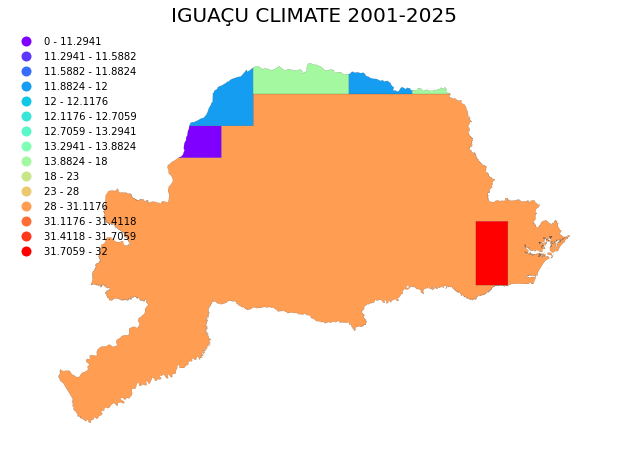

In [231]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri01_25['GRIDCODE'], k=17)
gplt.choropleth(tri01_25, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 2001-2025', fontsize=20);

In [232]:
# 2026-2050 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-A1FI.geojson').content
df_26_50 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri26_50 = df_26_50.clip(df_tri)

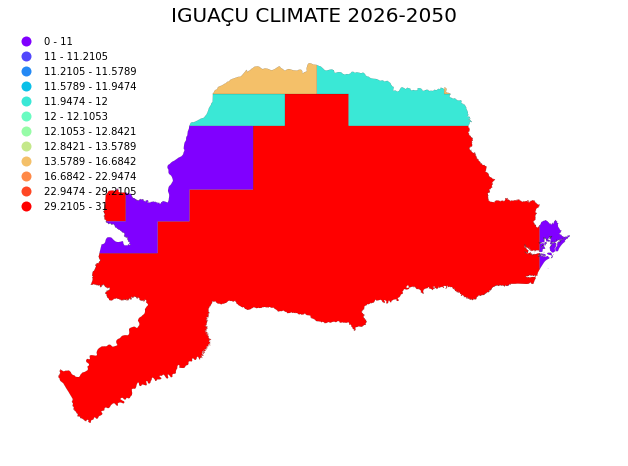

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri26_50['GRIDCODE'], k=19)
gplt.choropleth(tri26_50, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 2026-2050', fontsize=20);

### 11 = Af - Tropical rainforest climate

All 12 months have an average precipitation of at least 60 mm (2.4 in). These climates usually occur within 10° latitude of the equator. This climate has no natural seasons in terms of thermal and moisture changes. When it is dominated most of the year by the doldrums low-pressure system due to the presence of the Intertropical Convergence Zone (ITCZ) and when there are no cyclones then the climate is qualified as equatorial. When the trade winds are dominant most of the year, the climate is a tropical trade-wind rainforest climate.

In [238]:
# 2051-2075 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-A1FI.geojson').content
df_51_75 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri51_75 = df_51_75.clip(df_tri)

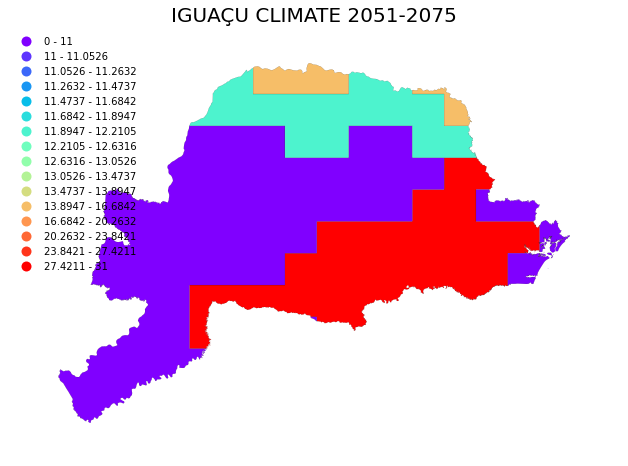

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri51_75['GRIDCODE'], k=19)
gplt.choropleth(tri51_75, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 2051-2075', fontsize=20);

In [247]:
# 2076-2100 cliped with trinational data
c = requests.get('https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-A1FI.geojson').content
df_76_10 = gpd.read_file(io.StringIO(c.decode('utf-8')))
tri76_10 = df_76_10.clip(df_tri)

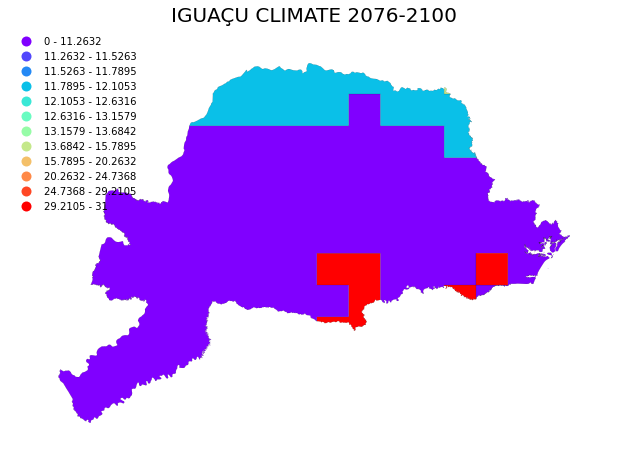

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(11, 8))
scheme = mc.Quantiles(tri76_10['GRIDCODE'], k=19)
gplt.choropleth(tri76_10, 
    hue="GRIDCODE", 
    linewidth=.1,
    scheme=scheme, cmap='rainbow',
    legend=True, legend_kwargs={'frameon': False, 'loc': 'upper left'},
    ax=ax);
ax.set_title('IGUAÇU CLIMATE 2076-2100', fontsize=20);

# **Analysis and conclusion**

Changes in climatic conditions lead to the redistribution of species diversity and the reorganization of ecosystems. In this study, maps from 1951 until 2000 showed the same parameter of 31 Cfa - humid subtropical climate to the studied area. But on the future prediction map of 2001-2025 it starts to appear a small part of 11 Af - tropical rainforest climate. This part gets bigger and bigger along the time, changing what was Cfa to Af. 

According to the map from 2026-2050 the Af portion starts entering the Iguaçu Area, until 2075-2051 the area is already all covered by Af climate. And in 2076-2100 Af climate dominates the whole Paraná State.  

However, the data provided by Köppen-Geiger alone is insufficient to observe any relationship between the construction of the Itaipú Dam and climate change in the region. Also, there are [factors not accounted for in the Köppen-Geiger classification](https://www.nature.com/articles/sdata2018214), such as higher atmospheric CO2 levels or nitrogen levels, that may alter the relationship between climate classes and vegetation.  
Moreover, critics point that most of the current Köppen climate classification world maps have a relatively low resolution of 0.5° ( [Cui, Liang, & Wang, 2021](https://essd.copernicus.org/preprints/essd-2021-53/essd-2021-53.pdf)). Therefore, future Köppen-Geiger classification is [recomended](https://essd.copernicus.org/preprints/essd-2021-53/essd-2021-53.pdf) to be interpreted as a tool to provid insights into potential spatial changes in regional climatic zones under climate change. 



